In [235]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_img(*args):
    fig_size = 5
    img_num_in_row = 2
    fig_num = len(args)
    fig = plt.figure(figsize=(fig_size * img_num_in_row, fig_size * (fig_num // img_num_in_row + 1)))
    for i in range(fig_num):
        img = args[i]
        xgrid, ygrid = np.meshgrid(np.arange(size), np.arange(size))
        
        ax = fig.add_subplot(fig_num // img_num_in_row + 1, img_num_in_row, i + 1)
        ax.pcolor(xgrid, ygrid, img, cmap="gray", linewidth=0)
        
    plt.show()

def surface_plot(*args):
    fig_size = 5
    img_num_in_row = 2
    fig_num = len(args)
    fig = plt.figure(figsize=(fig_size * img_num_in_row, fig_size * (fig_num // img_num_in_row + 1)))

    for i in range(fig_num):
        img = args[i]
        xgrid, ygrid = np.meshgrid(np.arange(size), np.arange(size))
        ax = fig.add_subplot(fig_num // img_num_in_row + 1, img_num_in_row, i + 1, projection='3d')
        ax.plot_surface(xgrid, ygrid, img, cmap='bwr', linewidth=0)

    fig.show()


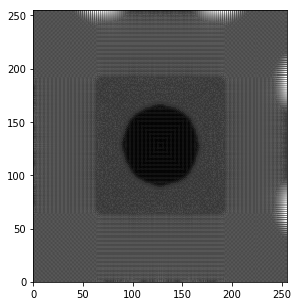

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


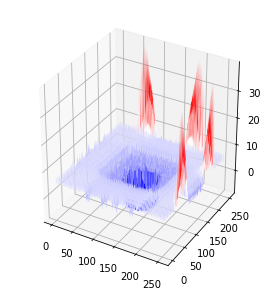

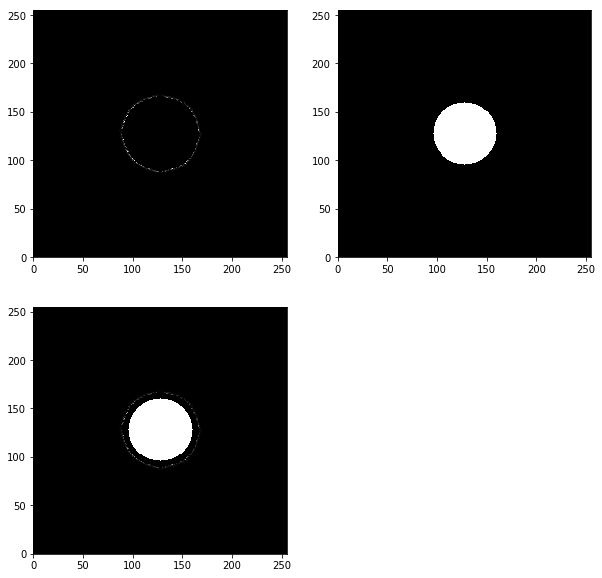

energy : 2044.7396562270387


In [240]:

import levelset
import importlib
importlib.reload(levelset)

size = 256
img = np.zeros((size, size))
img[:, :] = 100

cv2.circle(img, (size // 2, size // 2), size // 8, 200, -1)

ls = levelset.LevelSet(img)

for i in range(650):
    ls.iterate()

show_img(ls.min_phi)
surface_plot(ls.min_phi)

delta = np.zeros(ls.min_phi.shape)
delta[np.where(np.abs(ls.min_phi) < ls.epsilon)] = 1 / (2 * ls.epsilon) * (
    1 + np.cos(ls.min_phi[np.where(np.abs(ls.min_phi) < ls.epsilon)] * np.pi / ls.epsilon))

show_img(delta, ls.img, delta * 100 + ls.img)
print("energy : {}".format(ls.min_energy))
